In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("./Car_sales.csv")
#to get rid of null values in the dataset
data = pd.DataFrame(dataset)
clean_data = data.dropna()
# 5 - Price in thousands #7 - Horsepower 
# Classifying the car sales as to the price and engine power
x = clean_data.iloc[:, [5, 7]].values

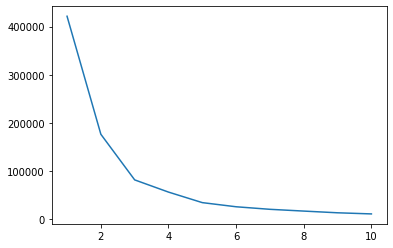

In [3]:
#Finding the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [4]:
#Ideal cluster number = 5
kmeans = KMeans(n_clusters=5, init="k-means++")
# Group the clean data values x
classify = kmeans.fit_predict(x)

In [5]:
classify

array([0, 3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 0, 1, 1, 1, 3, 2, 0,
       0, 1, 1, 3, 0, 3, 0, 1, 1, 4, 3, 1, 1, 0, 1, 0, 3, 1, 1, 3, 3, 1,
       3, 0, 3, 0, 0, 1, 3, 3, 0, 0, 1, 3, 0, 3, 3, 3, 3, 2, 2, 3, 0, 1,
       1, 3, 1, 3, 1, 0, 0, 1, 3, 3, 1, 1, 3, 2, 2, 0, 1, 3, 1, 1, 1, 3,
       3, 1, 0, 0, 1, 1, 1, 3, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       1, 3, 0, 0, 1, 0, 0], dtype=int32)

In [6]:
# Add the classification data to the already existing table
pd.concat([dataset,pd.DataFrame(classify)],axis=1)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,0
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,0.0
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,3.0
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,3.0
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,1.0
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,NaN
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,NaN
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,NaN
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,NaN


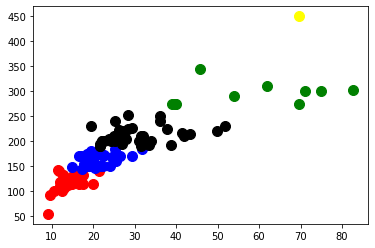

In [9]:
# Displaying output from classification algorithm
plt.scatter(x[classify==0,0],x[classify==0,1],s=100,c='red')
plt.scatter(x[classify==1,0],x[classify==1,1],s=100,c='blue')
plt.scatter(x[classify==2,0],x[classify==2,1],s=100,c='green')
plt.scatter(x[classify==3,0],x[classify==3,1],s=100,c='black')
plt.scatter(x[classify==4,0],x[classify==4,1],s=100,c='yellow')

plt.show()
